In [1]:
# importamos las librerias necesarias
import pandas as pd
import faker as fk
import random as rd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import openpyxl

In [2]:
planetas = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

In [3]:
# Para el apartado A
L1 = 1.00
t1 = 0.46
g_a = 2*L1 / (t1**2)
print("La aceleración de la gravedad es: ", g_a)

La aceleración de la gravedad es:  9.45179584120983


In [4]:
# Para el apartado B
L2 = 2.00
t2 = 0.66
g_b = 2*L2 / (t2**2)
print("La aceleración de la gravedad es: ", g_b)

La aceleración de la gravedad es:  9.182736455463727


In [10]:
# creamos un dataframe con los datos
df = pd.DataFrame({
    'Longitud': [L1, L2],
    'Tiempo': [t1, t2],
    'Gravedad': [g_a, g_b],
    'Planeta más cercano': ['Tierra', 'Saturno'],
    '2ndo más cercano': ['Saturno', 'Tierra']},index= ['Escenario A', 'Escenario B'])
df

,Longitud,Tiempo,Gravedad,Planeta más cercano,2ndo más cercano
Escenario A,1.0,0.46,9.451796,Tierra,Saturno
Escenario B,2.0,0.66,9.182736,Saturno,Tierra


In [35]:
fake = fk.Faker()

def generar_datos(planetas):
    L = round(rd.uniform(0.7, 2.5), 2)
    t = round(rd.uniform(0.3, 0.8), 2)
    g_calculada = round((2*L) / (t**2), 2)
    
    diferencia_minima = float('inf')
    planeta_mas_cercano = ''
    
    for planeta, gravedad in planetas.items():
        diferencia = abs(gravedad - g_calculada)
        if diferencia < diferencia_minima:
            diferencia_minima = diferencia
            planeta_mas_cercano = planeta
    
    diferencia_minima_2 = float('inf')
    segundo_planeta_mas_cercano = ''
        
    for planeta, gravedad in planetas.items():
        if planeta != planeta_mas_cercano:
            diferencia = abs(gravedad - g_calculada)
            if diferencia < diferencia_minima_2:
                diferencia_minima_2 = diferencia
                segundo_planeta_mas_cercano = planeta

    return {
        'Id': fake.uuid4(),
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': g_calculada,
        'Planeta más cercano': planeta_mas_cercano,
        '2ndo más cercano': segundo_planeta_mas_cercano
    }

dataframe = pd.DataFrame([generar_datos(planetas) for _ in range(1000)])
dataframe

,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,2ndo más cercano
0,aa9af4a9-aa7c-4caa-96f0-46c5b10704cd,2.31,0.63,11.64,Neptuno,Tierra
1,ceac46e6-ca0e-499a-a5c2-0556fdeaad16,0.88,0.39,11.57,Neptuno,Tierra
2,dfbcc07e-e7f5-4efa-b308-a51e616b3d7c,2.11,0.53,15.02,Neptuno,Tierra
3,f4d244ab-702d-439e-92ed-caa3c4f831b3,1.17,0.73,4.39,Marte,Urano
4,cd2891ed-5ed0-49f3-a1e8-6633c6acc0f5,1.03,0.61,5.54,Marte,Urano
...,...,...,...,...,...,...
995,064f7a7d-ffed-4737-946d-b4184fddadda,1.10,0.48,9.55,Tierra,Saturno
996,83c5e459-7184-4391-ba19-366a1549a678,1.94,0.70,7.92,Urano,Saturno
997,2a273476-d2e5-4141-82d6-d3a514c13322,2.07,0.52,15.31,Neptuno,Tierra
998,fed40f4d-b702-4490-9170-1f9efc60fe6e,1.16,0.54,7.96,Urano,Saturno


In [36]:
# creamos un archivo excel con los datos
def crear_excel():
    df = pd.DataFrame(dataframe)
    df.to_excel('Datos_experimentos.xlsx', index=False)
    print('Archivo creado con éxito')

crear_excel()

df = pd.DataFrame(dataframe)
df

Archivo creado con éxito


,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,2ndo más cercano
0,aa9af4a9-aa7c-4caa-96f0-46c5b10704cd,2.31,0.63,11.64,Neptuno,Tierra
1,ceac46e6-ca0e-499a-a5c2-0556fdeaad16,0.88,0.39,11.57,Neptuno,Tierra
2,dfbcc07e-e7f5-4efa-b308-a51e616b3d7c,2.11,0.53,15.02,Neptuno,Tierra
3,f4d244ab-702d-439e-92ed-caa3c4f831b3,1.17,0.73,4.39,Marte,Urano
4,cd2891ed-5ed0-49f3-a1e8-6633c6acc0f5,1.03,0.61,5.54,Marte,Urano
...,...,...,...,...,...,...
995,064f7a7d-ffed-4737-946d-b4184fddadda,1.10,0.48,9.55,Tierra,Saturno
996,83c5e459-7184-4391-ba19-366a1549a678,1.94,0.70,7.92,Urano,Saturno
997,2a273476-d2e5-4141-82d6-d3a514c13322,2.07,0.52,15.31,Neptuno,Tierra
998,fed40f4d-b702-4490-9170-1f9efc60fe6e,1.16,0.54,7.96,Urano,Saturno


In [38]:
print(df.describe())

       Longitud (m)   Tiempo (s)  Gravedad (m/s^2)
count   1000.000000  1000.000000       1000.000000
mean       1.591070     0.556110         12.894710
std        0.521607     0.143813          9.085398
min        0.700000     0.300000          2.340000
25%        1.130000     0.430000          6.650000
50%        1.590000     0.560000          9.945000
75%        2.050000     0.680000         16.380000
max        2.500000     0.800000         51.200000


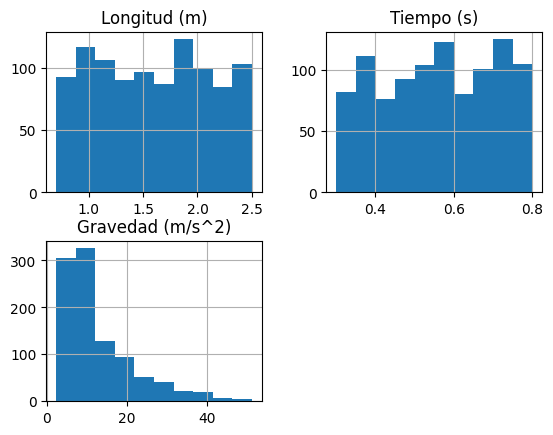

In [39]:
# histogramas
df.hist(column=['Longitud (m)', 'Tiempo (s)', 'Gravedad (m/s^2)'])
plt.show()

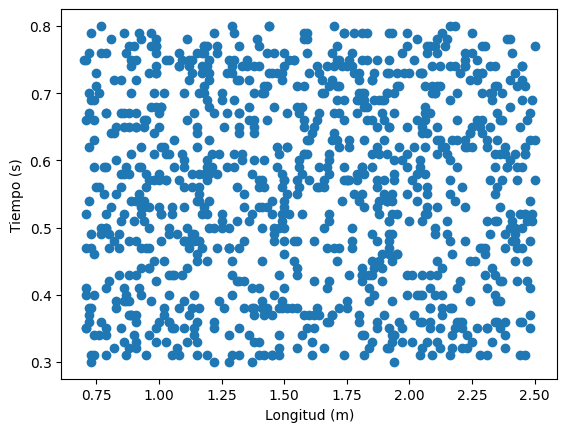

In [40]:
# grafico de dispersion
plt.scatter(df['Longitud (m)'], df['Tiempo (s)'])
plt.xlabel('Longitud (m)')
plt.ylabel('Tiempo (s)')
plt.show()

In [41]:
# codificar etiquetas de planetas 
codificador_etiquetas = LabelEncoder()
df['Planeta más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['Planeta más cercano'])
df['2ndo más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['2ndo más cercano'])

In [42]:
# correlación entre variables 
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric.corr())


                              Longitud (m)  Tiempo (s)  Gravedad (m/s^2)   
Longitud (m)                      1.000000    0.027397          0.452803  \
Tiempo (s)                        0.027397    1.000000         -0.779812   
Gravedad (m/s^2)                  0.452803   -0.779812          1.000000   
Planeta más cercano (codigo)     -0.049793    0.411137         -0.522482   
2ndo más cercano (codigo)        -0.386659    0.543386         -0.629919   

                              Planeta más cercano (codigo)   
Longitud (m)                                     -0.049793  \
Tiempo (s)                                        0.411137   
Gravedad (m/s^2)                                 -0.522482   
Planeta más cercano (codigo)                      1.000000   
2ndo más cercano (codigo)                        -0.048433   

                              2ndo más cercano (codigo)  
Longitud (m)                                  -0.386659  
Tiempo (s)                                     0.54338

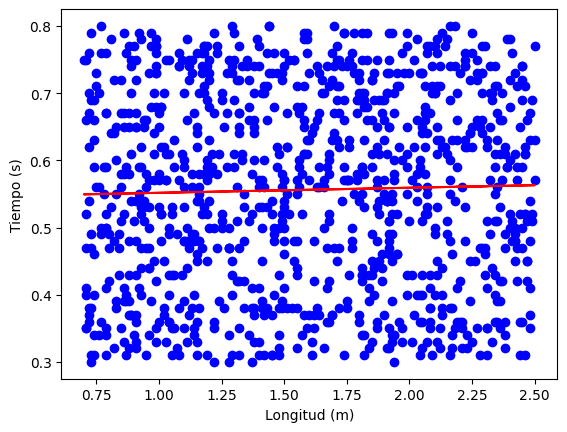

In [43]:
# regresion lineal 
X = df['Longitud (m)'].values.reshape(-1, 1)
y = df['Tiempo (s)'].values.reshape(-1, 1)
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)

y_pred = regresion_lineal.predict(X)
plt.scatter(X, y, color='blue') 
plt.plot(X, y_pred, color='red')
plt.xlabel('Longitud (m)')
plt.ylabel('Tiempo (s)')
plt.show()